In [12]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plt.rcParams['figure.figsize'] = (20, 10)

In [130]:
generation_source=pd.read_csv('data/generation.csv', sep=';', decimal=',', parse_dates=True)
generation_nandrop=generation_source.dropna()

temperature_source=pd.read_csv('data/temperature.csv', sep=';', decimal=',', parse_dates=True)
temperature_nandrop=temperature_source.drop(temperature_source.tail(95).index)

df = temperature_nandrop.merge(generation_nandrop, on='DateTime', how='left')
df["DateTime"] = pd.to_datetime(df["DateTime"],format="%d%b%Y %H:%M:%S")
df = df[~np.isnan(df.Generation)]
df.head()

,DateTime,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover,Generation
0,2019-01-01 00:00:00,-1.7,-6.1,75.3,3.6,60.0,10.0,6.3,0.000000
1,2019-01-01 01:00:00,-1.8,-5.3,75.3,2.6,70.0,10.0,4.5,0.000000
2,2019-01-01 02:00:00,-2.0,-6.0,74.7,3.1,80.0,10.0,5.5,0.000008
3,2019-01-01 03:00:00,-1.9,-5.9,76.4,3.1,60.0,10.0,7.6,0.000000
4,2019-01-01 04:00:00,-2.0,-7.1,76.4,4.6,60.0,10.0,6.5,0.000008


### In the Generation Table
- **DateTime**: specifies the time range in which the product was made in the date-time format.
- **Generation**: Specifies the total production in MWh in the relevant hour range.

### In the Temperature Table
- **DateTime**: Specifies the time interval in which temperature variables are observed.
- **AirTemperature**: Specifies the air temperature in the hour range in Celsius.
- **ComfortTemperature**: Indicates the sensed air temperature in the hour range in Celsius.
- **RelativeHumidity**: Specifies the humidity in the hour range.
- **WindSpeed**: Specifies the wind speed in the hour range in km/h.
- **WindDirection**: Specifies the wind direction in the hour range.
- **WWCode**: Specifies the weather code in the time range.
- **EffectiveCloudCover**: Specifies the amount of cloudiness in the hour range in octal units of measure.

In [131]:
df.describe()

,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover,Generation
count,25560.000000,25560.000000,25560.000000,25560.000000,25560.000000,19306.000000,25560.000000,25560.000000
mean,14.015544,13.514221,53.686084,1.672966,86.913028,12.867865,2.573795,89.724239
std,9.344895,9.743065,22.405899,1.358169,100.825143,24.326202,2.487385,126.180117
min,-13.100000,-19.300000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,5.400000,35.700000,0.500000,20.000000,0.000000,0.000000,0.000000
50%,13.800000,13.400000,54.200000,1.500000,30.000000,3.000000,2.000000,4.317082
75%,21.200000,21.400000,71.600000,2.600000,170.000000,10.000000,5.000000,168.498464
max,39.000000,37.200000,100.000000,13.400000,360.000000,99.000000,8.000000,456.319322


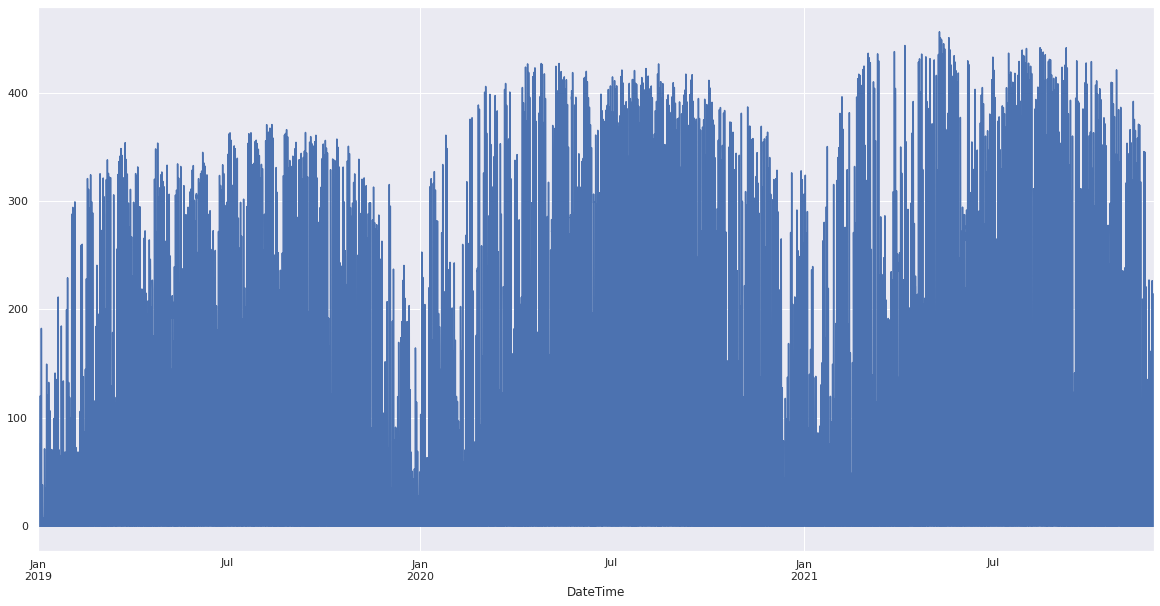

In [132]:
df.set_index("DateTime").Generation.plot()
plt.show()

In [133]:
df_exp = df.copy()
df_exp["hour"] = df_exp.DateTime.dt.hour
df_exp["dayofmonth"] = df_exp.DateTime.dt.day
df_exp["dayofweek"] = df_exp.DateTime.dt.dayofweek
df_exp["month"] = df_exp.DateTime.dt.month
df_exp["quarter"] = df_exp.DateTime.dt.quarter
df_exp["year"] = df_exp.DateTime.dt.year
df_exp.head()

,DateTime,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover,Generation,hour,dayofmonth,dayofweek,month,quarter,year
0,2019-01-01 00:00:00,-1.7,-6.1,75.3,3.6,60.0,10.0,6.3,0.000000,0,1,1,1,1,2019
1,2019-01-01 01:00:00,-1.8,-5.3,75.3,2.6,70.0,10.0,4.5,0.000000,1,1,1,1,1,2019
2,2019-01-01 02:00:00,-2.0,-6.0,74.7,3.1,80.0,10.0,5.5,0.000008,2,1,1,1,1,2019
3,2019-01-01 03:00:00,-1.9,-5.9,76.4,3.1,60.0,10.0,7.6,0.000000,3,1,1,1,1,2019
4,2019-01-01 04:00:00,-2.0,-7.1,76.4,4.6,60.0,10.0,6.5,0.000008,4,1,1,1,1,2019


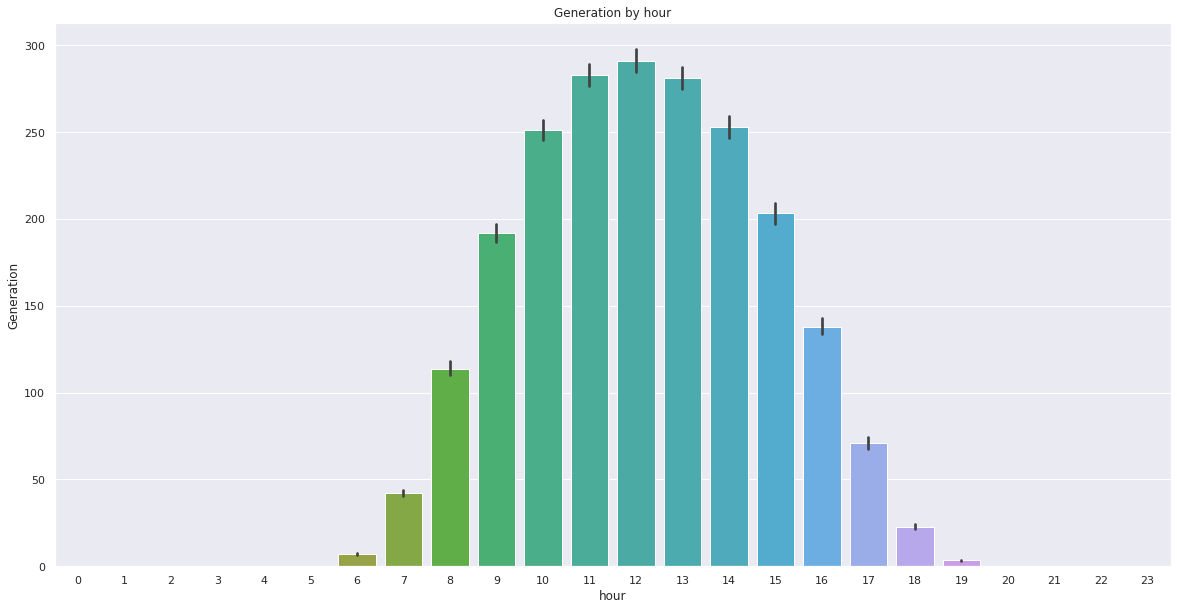

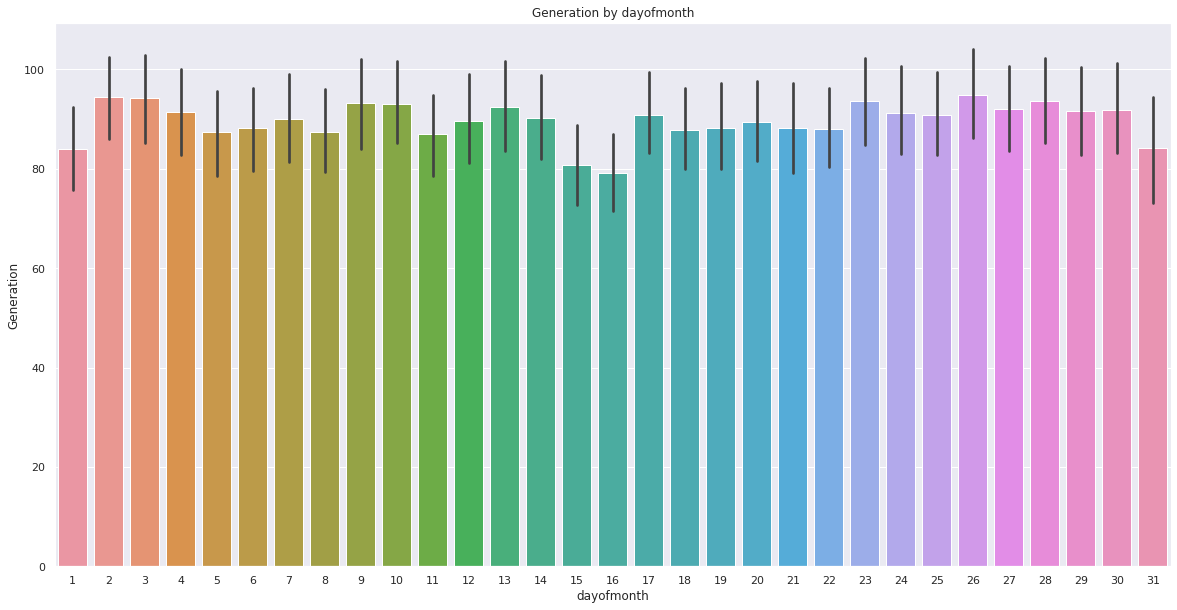

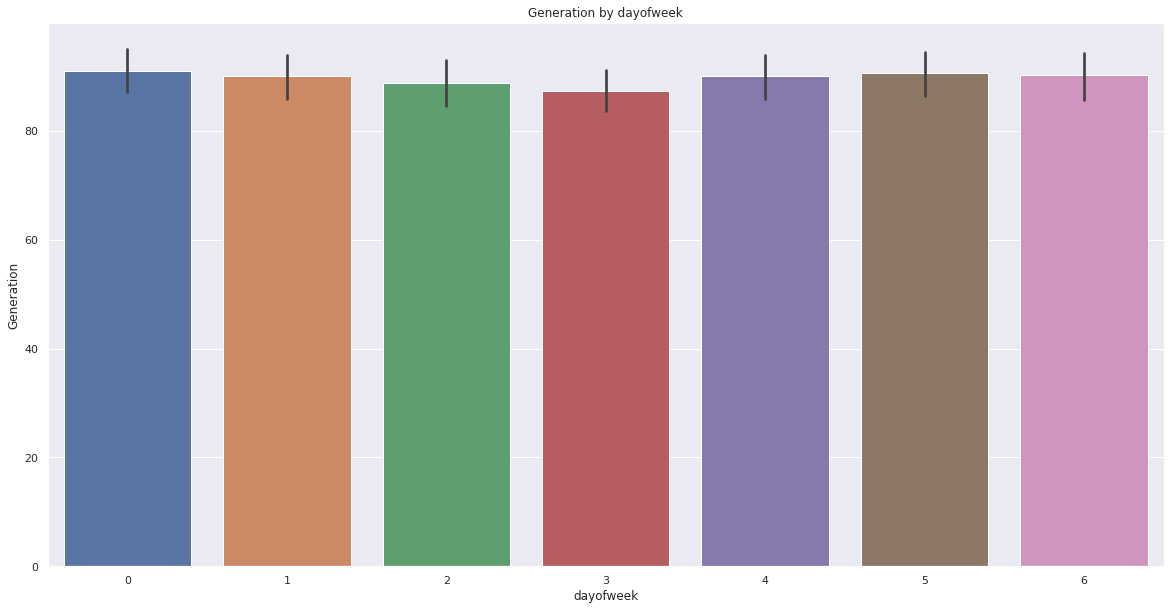

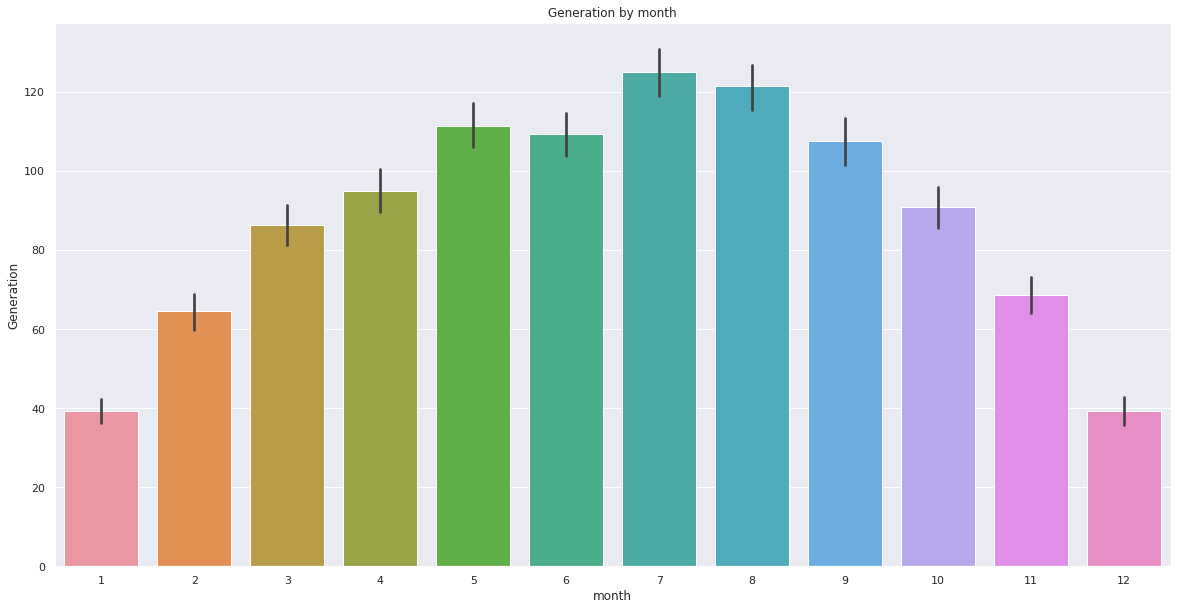

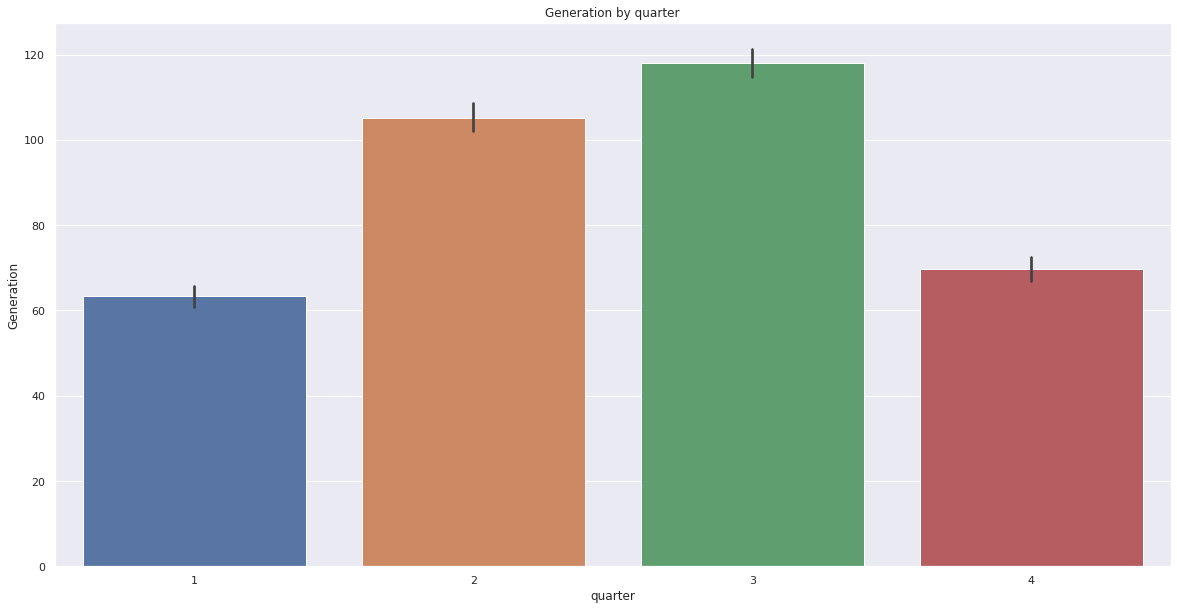

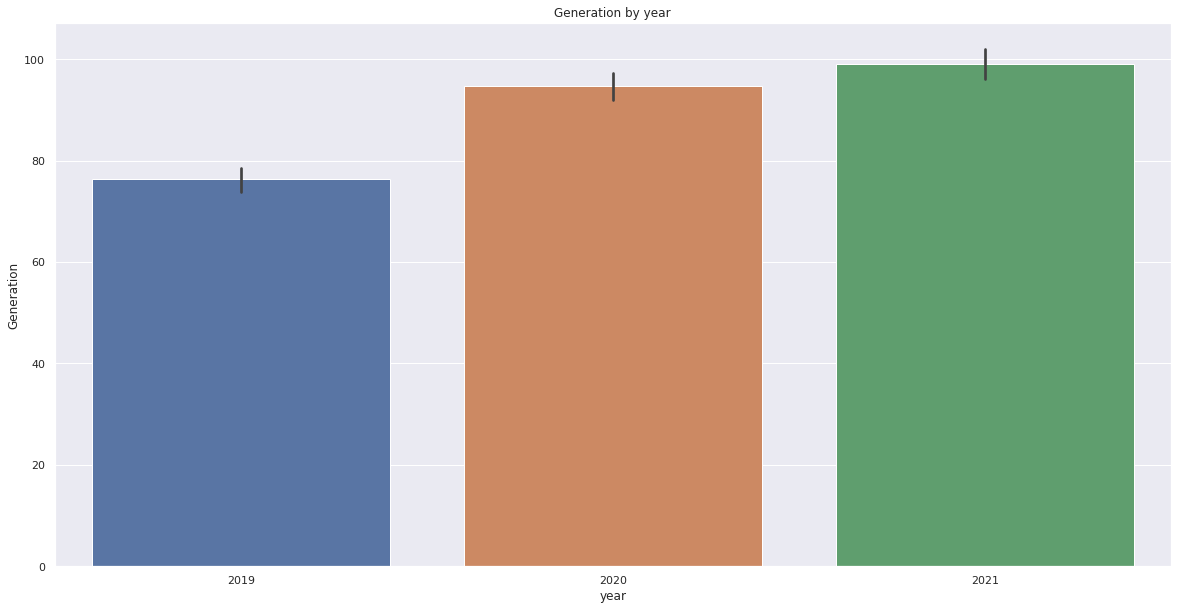

In [134]:
for feature_name in ["hour","dayofmonth","dayofweek","month","quarter","year"]:
    sns.barplot(x=df_exp[feature_name],  y=df_exp.Generation)
    plt.title("Generation by " + feature_name)
    plt.show()

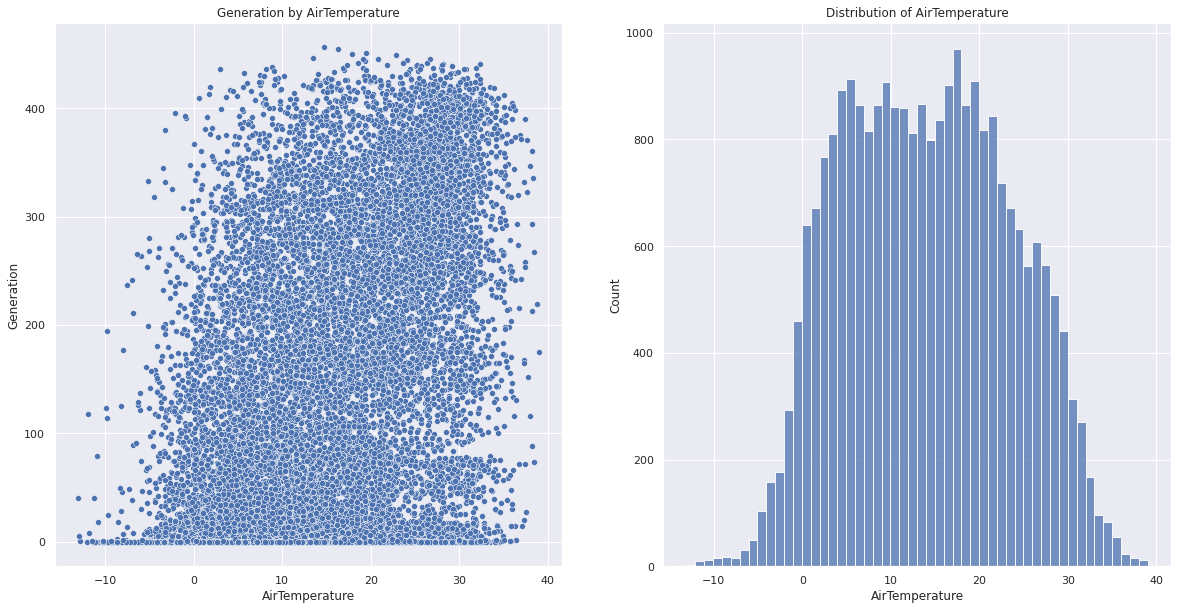

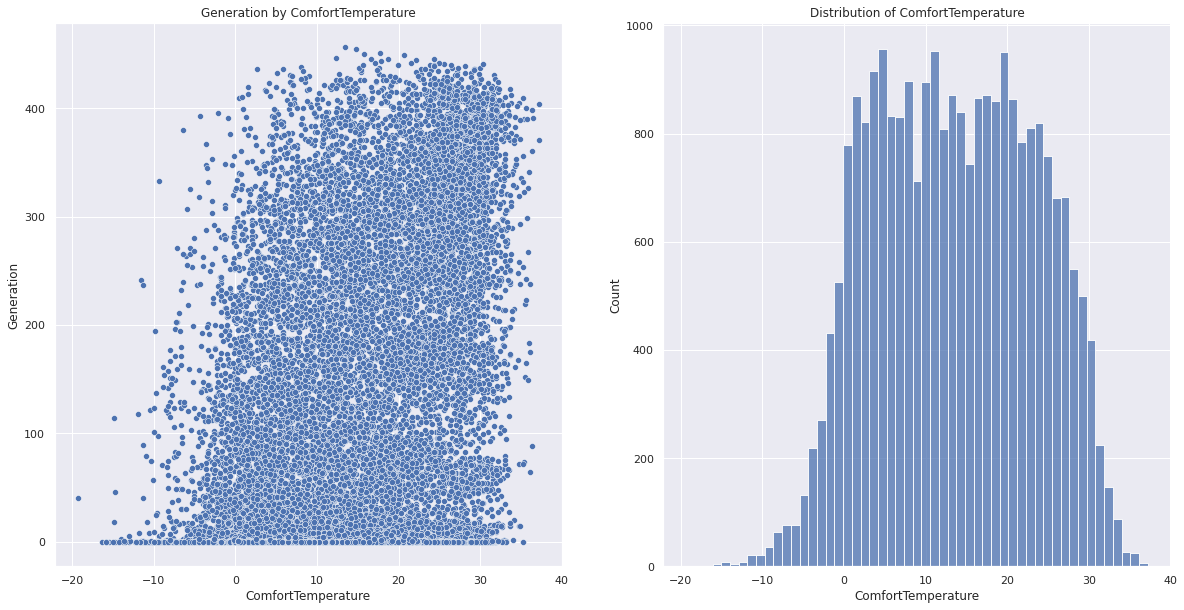

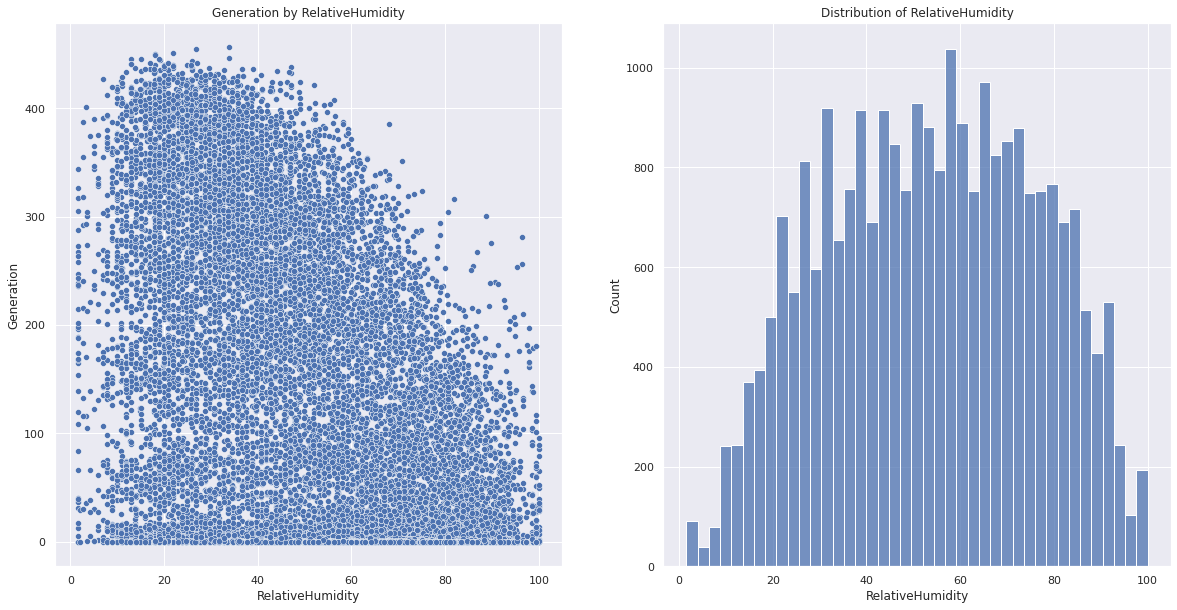

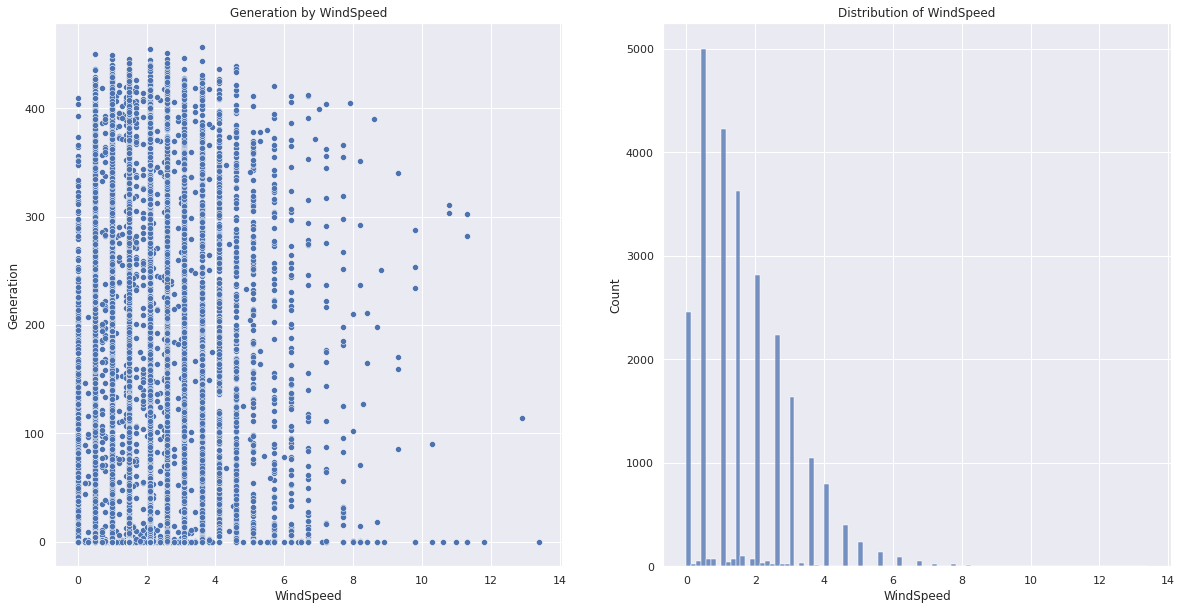

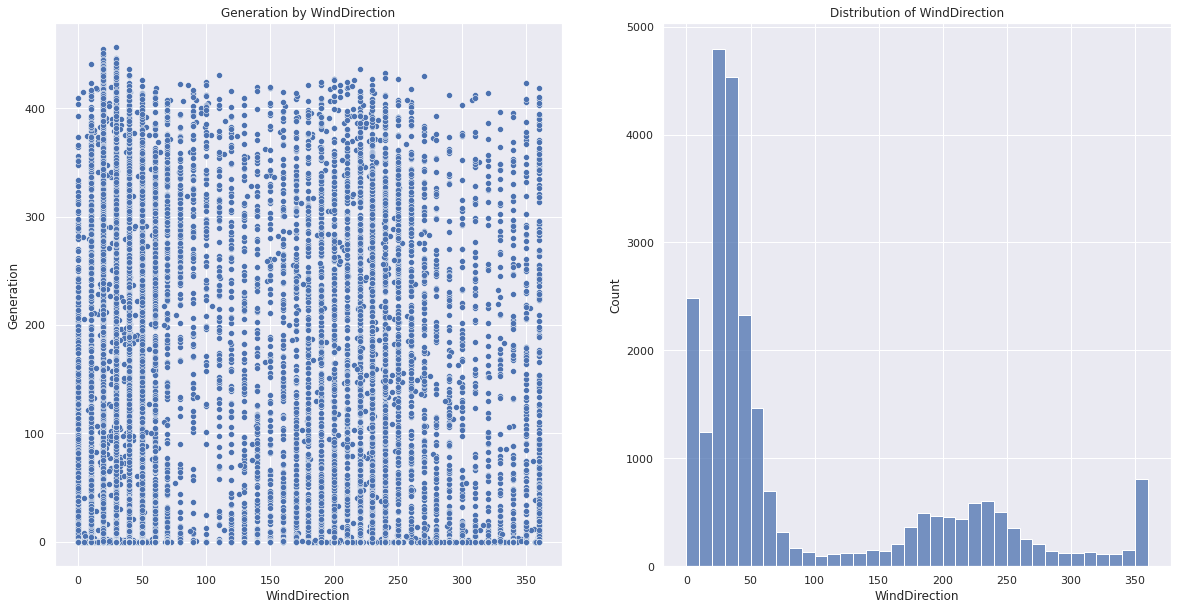

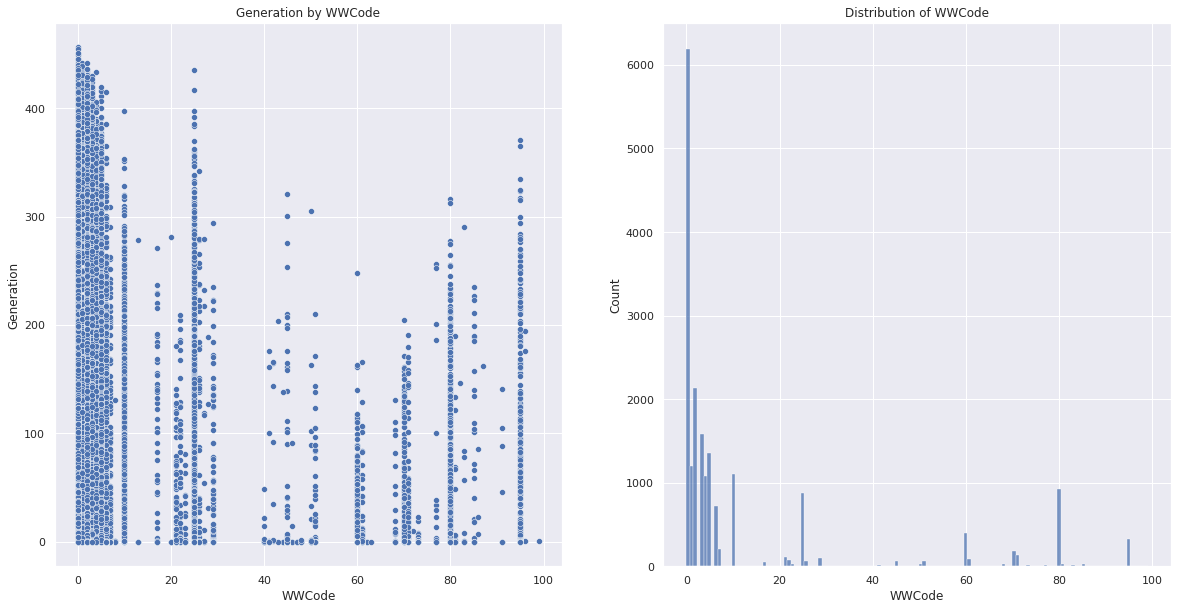

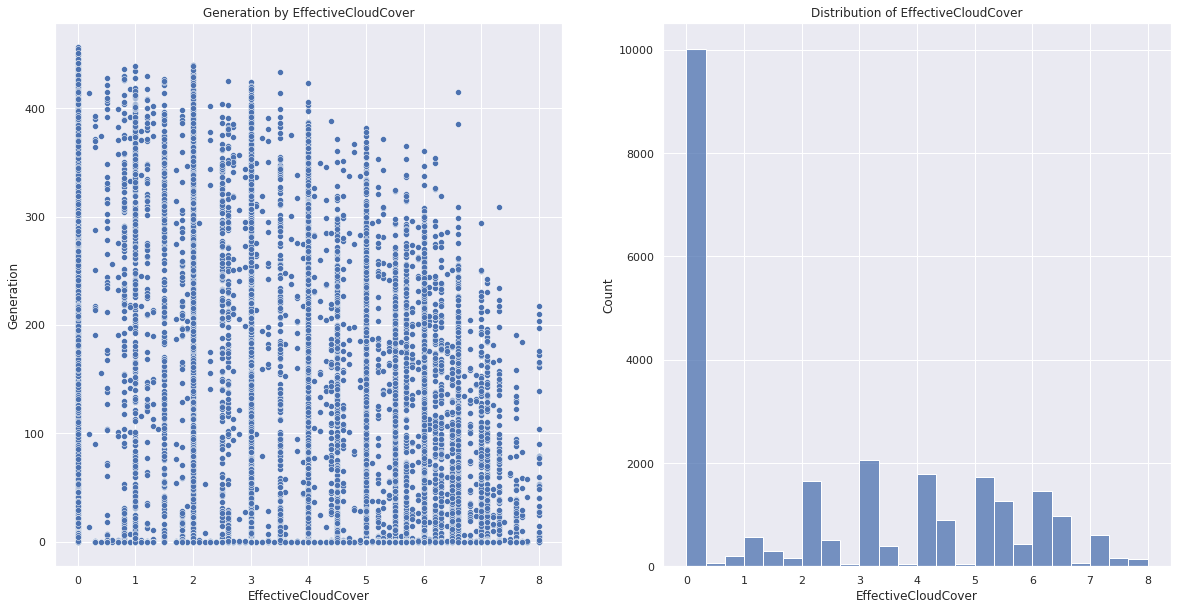

In [135]:
for feature_name in ["AirTemperature","ComfortTemperature","RelativeHumidity","WindSpeed","WindDirection","WWCode","EffectiveCloudCover"]:
    fig, axes = plt.subplots(1,2)
    sns.scatterplot(ax=axes[0], x=df_exp[feature_name], y=df_exp.Generation),
    sns.histplot(ax=axes[1], x=df_exp[feature_name])
    axes[0].title.set_text("Generation by " + feature_name)
    axes[1].title.set_text("Distribution of " + feature_name)
    plt.show()

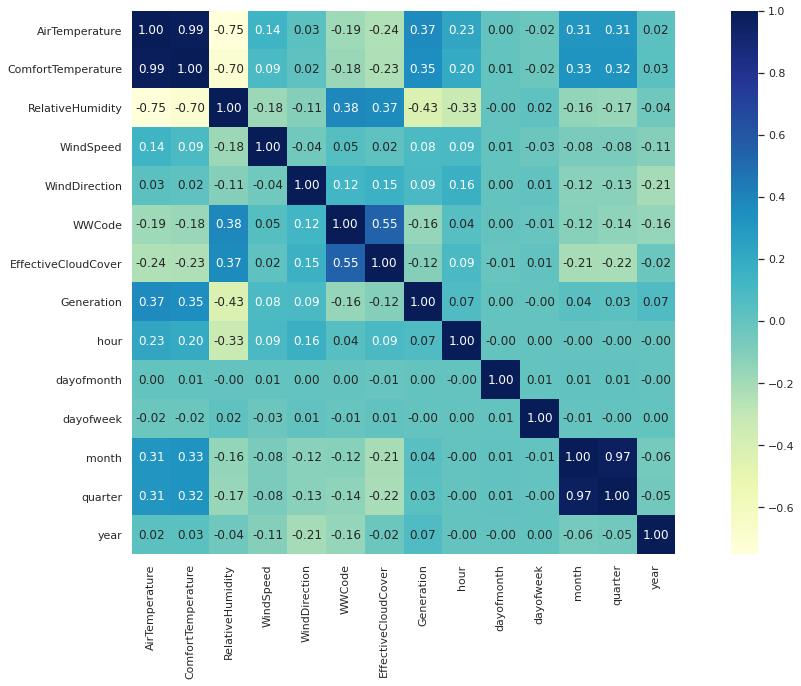

In [136]:
corr =  df_exp.corr()
sns.heatmap(corr, annot=True, fmt='.2f', square=True, cmap="YlGnBu")
plt.show()

# Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression

### Preprocess

In [152]:
dfLR = df_exp.copy().set_index("DateTime")
dfLR = dfLR.drop(columns="Generation")
dfLR["Generation"] = df_exp["Generation"].tolist()

LOOKBACK = 24

for i in range(LOOKBACK):
    dfLR[f"Generation t-{i+1}"] = dfLR["Generation"].shift(periods=i+1)
    
dfLR.head()

,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover,hour,dayofmonth,dayofweek,...,Generation t-15,Generation t-16,Generation t-17,Generation t-18,Generation t-19,Generation t-20,Generation t-21,Generation t-22,Generation t-23,Generation t-24
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-1.7,-6.1,75.3,3.6,60.0,10.0,6.3,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 01:00:00,-1.8,-5.3,75.3,2.6,70.0,10.0,4.5,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00,-2.0,-6.0,74.7,3.1,80.0,10.0,5.5,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,-1.9,-5.9,76.4,3.1,60.0,10.0,7.6,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00,-2.0,-7.1,76.4,4.6,60.0,10.0,6.5,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
dfLR = dfLR.dropna()
dfLR.head()

,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover,hour,dayofmonth,dayofweek,...,Generation t-15,Generation t-16,Generation t-17,Generation t-18,Generation t-19,Generation t-20,Generation t-21,Generation t-22,Generation t-23,Generation t-24
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-02 02:00:00,-1.3,-5.1,81.3,3.1,50.0,73.0,4.5,2,2,2,...,129.282284,96.165907,48.924128,12.884461,1.072304,0.000000,0.000000,0.000008,0.000000,0.000008
2019-01-02 03:00:00,-0.6,-3.9,78.4,2.6,50.0,70.0,7.7,3,2,2,...,147.562781,129.282284,96.165907,48.924128,12.884461,1.072304,0.000000,0.000000,0.000008,0.000000
2019-01-02 04:00:00,-0.8,-4.5,83.2,3.1,60.0,70.0,6.5,4,2,2,...,140.830250,147.562781,129.282284,96.165907,48.924128,12.884461,1.072304,0.000000,0.000000,0.000008
2019-01-02 05:00:00,-1.4,-5.3,88.9,3.1,70.0,71.0,7.0,5,2,2,...,111.398018,140.830250,147.562781,129.282284,96.165907,48.924128,12.884461,1.072304,0.000000,0.000000
2019-01-02 06:00:00,-1.5,-4.9,92.9,2.6,60.0,71.0,7.8,6,2,2,...,56.616417,111.398018,140.830250,147.562781,129.282284,96.165907,48.924128,12.884461,1.072304,0.000000


In [154]:
dfLR.tail()

,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover,hour,dayofmonth,dayofweek,...,Generation t-15,Generation t-16,Generation t-17,Generation t-18,Generation t-19,Generation t-20,Generation t-21,Generation t-22,Generation t-23,Generation t-24
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-11-30 19:00:00,7.1,5.2,76.8,3.1,220.0,25.0,6.0,19,30,1,...,0.000000,0.000000,0.000000,0.0,0.000001,0.000000,0.000000,0.000000,0.000000,0.0
2021-11-30 20:00:00,7.1,5.7,75.2,2.1,250.0,80.0,6.0,20,30,1,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000001,0.000000,0.000000,0.000000,0.0
2021-11-30 21:00:00,5.8,3.1,83.4,4.1,280.0,80.0,7.0,21,30,1,...,0.033137,0.000000,0.000000,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.0
2021-11-30 22:00:00,5.0,3.3,81.0,2.1,240.0,60.0,6.0,22,30,1,...,3.994967,0.033137,0.000000,0.0,0.000000,0.000000,0.000000,0.000001,0.000000,0.0
2021-11-30 23:00:00,5.0,4.8,85.7,1.0,210.0,60.0,6.0,23,30,1,...,37.503905,3.994967,0.033137,0.0,0.000000,0.000000,0.000000,0.000000,0.000001,0.0


### Train Test Split

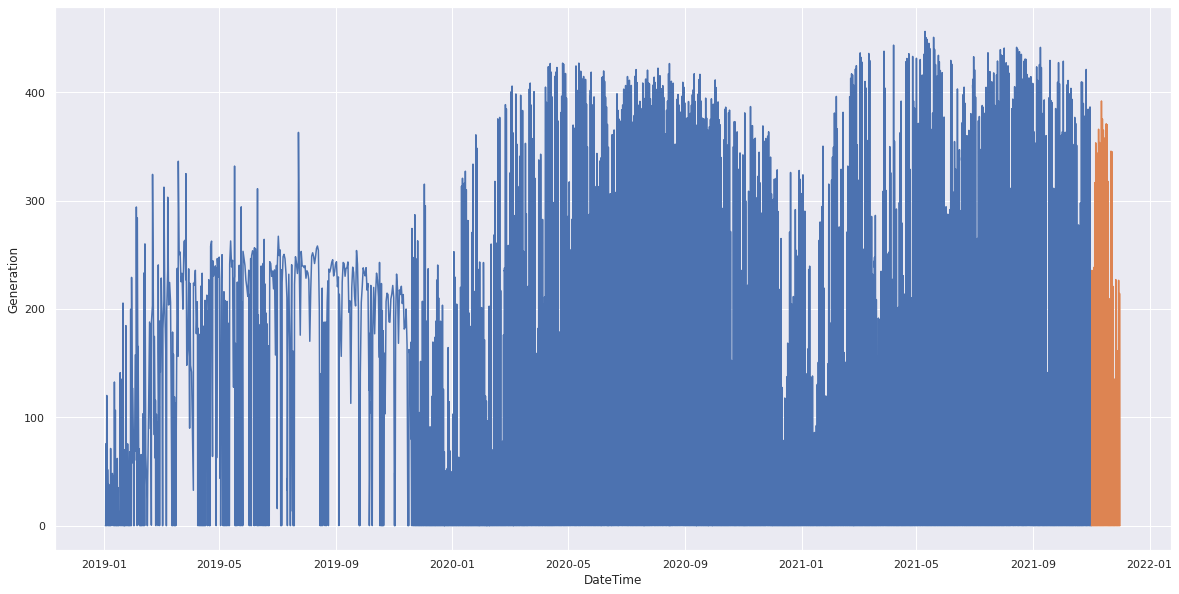

In [155]:
split_size = len(dfLR) - 24*30
X = dfLR.drop(columns="Generation")
y = dfLR["Generation"].to_frame()

dfLR_train_X, dfLR_train_y = X[0:split_size], y[0:split_size]
dfLR_test_X, dfLR_test_y = X[split_size:-1],  y[split_size:-1]

sns.lineplot(x=dfLR_train_y.index, y=dfLR_train_y.Generation)
sns.lineplot(x=dfLR_test_y.index, y=dfLR_test_y.Generation)
plt.show()

In [156]:
model = LinearRegression()
model.fit(dfLR_train_X, dfLR_train_y)

LinearRegression()

In [170]:
prediction = model.predict(dfLR_test_X).transpose()[0]

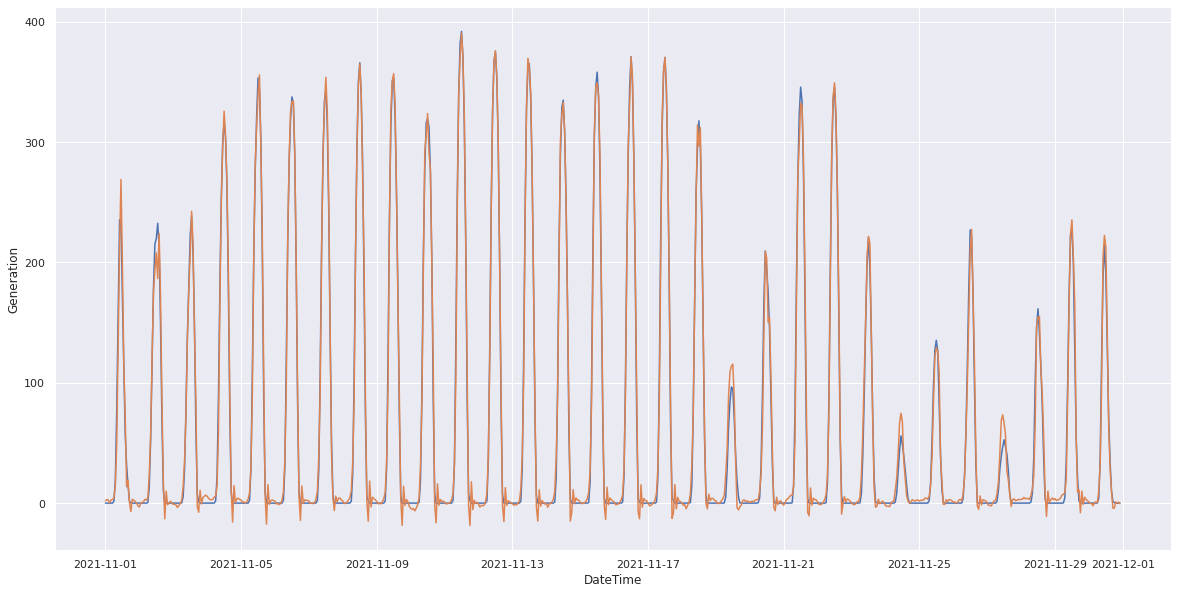

In [171]:
sns.lineplot(x=dfLR_test_y.index, y=dfLR_test_y.Generation)
sns.lineplot(x=dfLR_test_y.index, y=prediction)
plt.show()

In [203]:
actual = np.array(dfLR_test_y.Generation.tolist())

#MAPE
MAPE_LR = round(np.mean(abs(actual[actual != 0] - prediction[actual != 0])/actual[actual != 0]*100),2)

#MAE
MAE_LR = round(np.mean(abs(actual - prediction)),2)

#RMSE
RMSE_LR = round(math.sqrt(mean_squared_error(actual,prediction)),2)

print("MAPE : ", MAPE_LR)
print("MAE : ", MAE_LR)
print("RMSE : ", RMSE_LR)

MAPE :  18353233.1
MAE :  6.46
RMSE :  9.5


# LSTM

In [205]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, RNN, Bidirectional
from tensorflow.keras.experimental import PeepholeLSTMCell
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

from sklearn.preprocessing import MinMaxScaler

### Preprocess

In [212]:
dfLSTM = df_exp.copy().set_index("DateTime")
dfLSTM = dfLSTM.drop(columns="Generation")
dfLSTM["Generation"] = df_exp["Generation"].tolist()
dfLSTM = dfLSTM.dropna()
dfLSTM.head()

,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover,hour,dayofmonth,dayofweek,month,quarter,year,Generation
DateTime,,,,,,,,,,,,,,
2019-01-01 00:00:00,-1.7,-6.1,75.3,3.6,60.0,10.0,6.3,0,1,1,1,1,2019,0.000000
2019-01-01 01:00:00,-1.8,-5.3,75.3,2.6,70.0,10.0,4.5,1,1,1,1,1,2019,0.000000
2019-01-01 02:00:00,-2.0,-6.0,74.7,3.1,80.0,10.0,5.5,2,1,1,1,1,2019,0.000008
2019-01-01 03:00:00,-1.9,-5.9,76.4,3.1,60.0,10.0,7.6,3,1,1,1,1,2019,0.000000
2019-01-01 04:00:00,-2.0,-7.1,76.4,4.6,60.0,10.0,6.5,4,1,1,1,1,2019,0.000008


In [295]:
scaler = MinMaxScaler()
scaler = scaler.fit(dfLSTM)
scaled_df = scaler.transform(dfLSTM)
target_scaled_df = scaled_df[:,-1]

NO_FEATURES = scaled_df.shape[1]
LOOKBACK = int(1*24/4)
OUTPUT_SIZE = 1

trainX = []
trainY = []

for i in range(LOOKBACK, len(scaled_df) - 1):
    trainX.append(scaled_df[i-LOOKBACK:i, 0:scaled_df.shape[1]])
    trainY.append(scaled_df[i:i+OUTPUT_SIZE, -1])

split_idx = int(len(trainX)*0.7)
trainX, testX = np.array(trainX[0:split_idx]), np.array(trainX[split_idx:-1])
trainY, testY = np.array(trainY[0:split_idx]), np.array(trainY[split_idx:-1])

In [302]:
LEARNING_RATE=1e-3
DECAY=1e-5
MAX_EPOCHS=200
BATCH_SIZE=128
VALID_SPLIT=0.2
PATIENCE=10

#model architecture
model=Sequential()

model.add(Bidirectional(LSTM(64, return_sequences= True), input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(128, return_sequences= True), input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))


# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())

# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())

# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())

# model.add(LSTM(32, return_sequences=False))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())

# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))


model.add(Dense(OUTPUT_SIZE))

#optimizing and training
opt=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, decay=DECAY)

model.compile(loss='mae', optimizer=opt, metrics=['mse'])
early_stopping=tf.keras.callbacks.EarlyStopping(patience=PATIENCE, restore_best_weights=True)

history=model.fit(trainX, trainY,
        epochs=MAX_EPOCHS, batch_size=BATCH_SIZE, validation_split=VALID_SPLIT,
                 callbacks=[early_stopping], verbose=1)

Epoch 1/200
85/85 [==============================] - 4s 14ms/step - loss: 0.6703 - mse: 0.8114 - val_loss: 0.1537 - val_mse: 0.0594
Epoch 2/200
85/85 [==============================] - 1s 8ms/step - loss: 0.2938 - mse: 0.1530 - val_loss: 0.1557 - val_mse: 0.0569
Epoch 3/200
85/85 [==============================] - 1s 8ms/step - loss: 0.1703 - mse: 0.0584 - val_loss: 0.1378 - val_mse: 0.0500
Epoch 4/200
85/85 [==============================] - 1s 7ms/step - loss: 0.1207 - mse: 0.0349 - val_loss: 0.0932 - val_mse: 0.0245
Epoch 5/200
85/85 [==============================] - 1s 6ms/step - loss: 0.0951 - mse: 0.0249 - val_loss: 0.0610 - val_mse: 0.0122
Epoch 6/200
85/85 [==============================] - 0s 6ms/step - loss: 0.0823 - mse: 0.0206 - val_loss: 0.0472 - val_mse: 0.0074
Epoch 7/200
85/85 [==============================] - 1s 6ms/step - loss: 0.0744 - mse: 0.0175 - val_loss: 0.0385 - val_mse: 0.0048
Epoch 8/200
85/85 [==============================] - 1s 6ms/step - loss: 0.0691 - 

Minimum Validation Loss: 0.0179


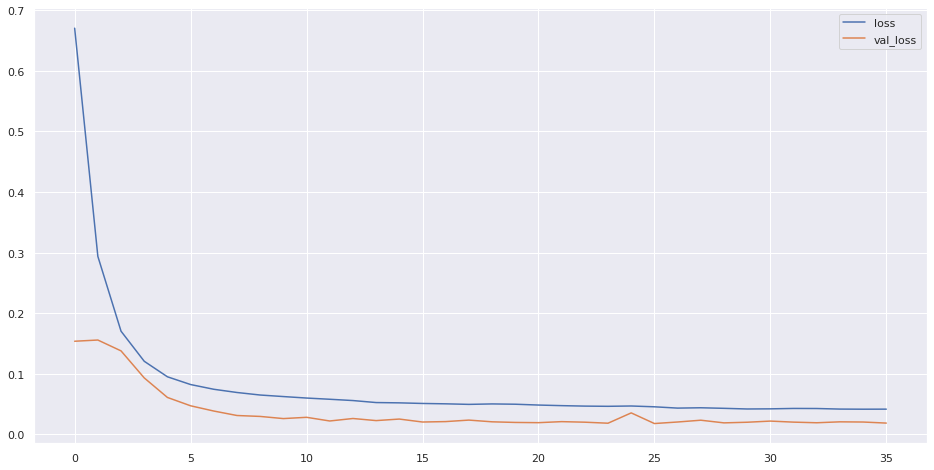

In [303]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(figsize=(16,8))
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [304]:
forecast_test = model.predict(testX)

In [305]:
actuals = testY.transpose()[0]

forecast_copies=np.repeat(np.array(forecast_test[:,0,:]).reshape(-1,1), dfLSTM.shape[1], axis=-1)
prediction=scaler.inverse_transform(forecast_copies)[:,-1]

actual_copies=np.repeat(np.array(actuals).reshape(-1,1), dfLSTM.shape[1], axis=-1)
actuals=scaler.inverse_transform(actual_copies)[:,-1]

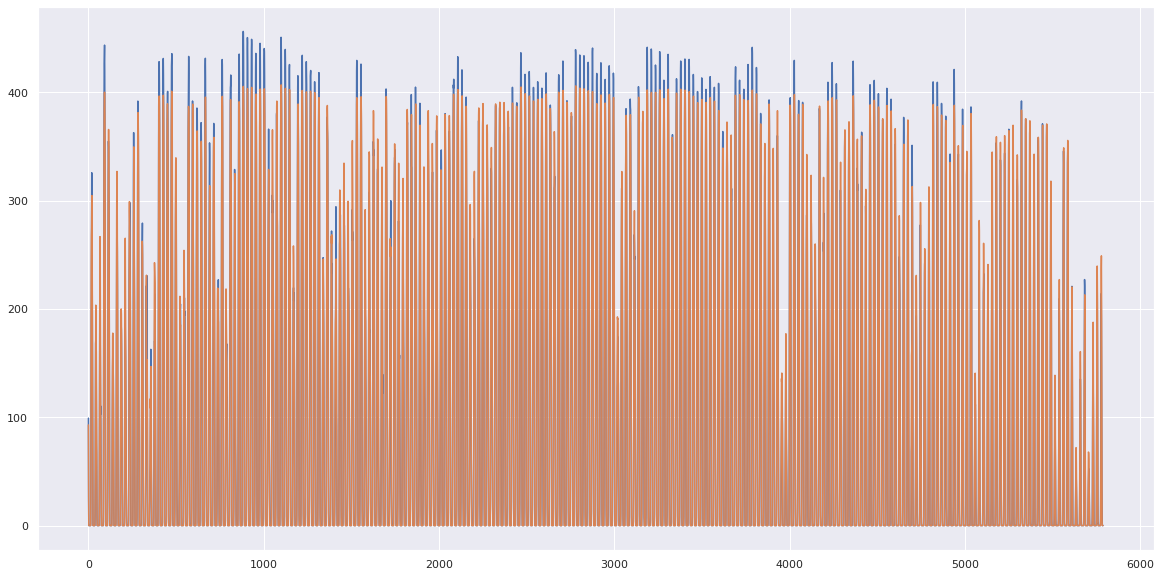

In [306]:
plt.plot(actuals)
plt.plot(prediction)
plt.show()

In [307]:
#MAPE
MAPE_LSTM = round(np.mean(abs(actuals[actuals != 0] - prediction[actuals != 0])/actuals[actuals != 0]*100),2)

#MAE
MAE_LSTM = round(np.mean(abs(actuals - prediction)),2)

#RMSE
RMSE_LSTM = round(math.sqrt(mean_squared_error(actuals,prediction)),2)

print("MAPE : ", MAPE_LSTM)
print("MAE : ", MAE_LSTM)
print("RMSE : ", RMSE_LSTM)

MAPE :  20725.4
MAE :  10.42
RMSE :  18.14
